In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import re
import nltk

In [5]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [9]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [10]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: xlabel='label'>

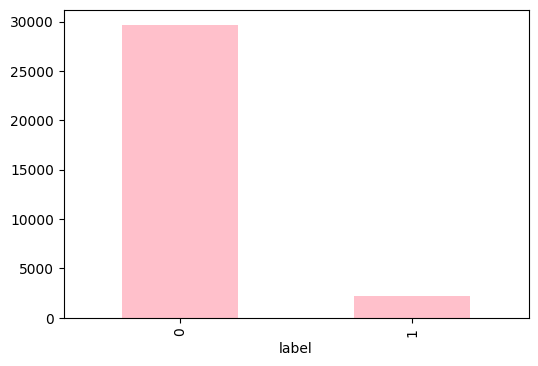

In [11]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

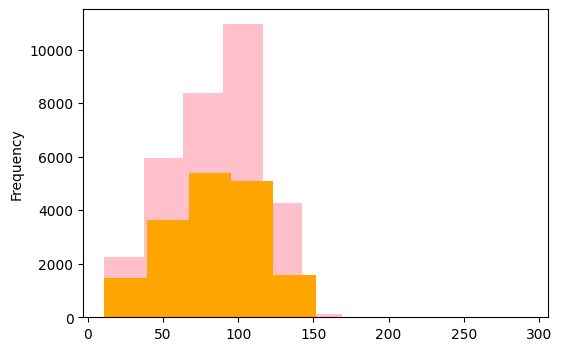

In [12]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [14]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

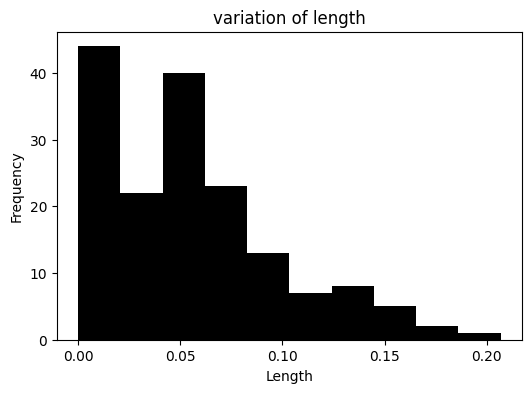

In [15]:
train.groupby('len')['label'].mean().plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

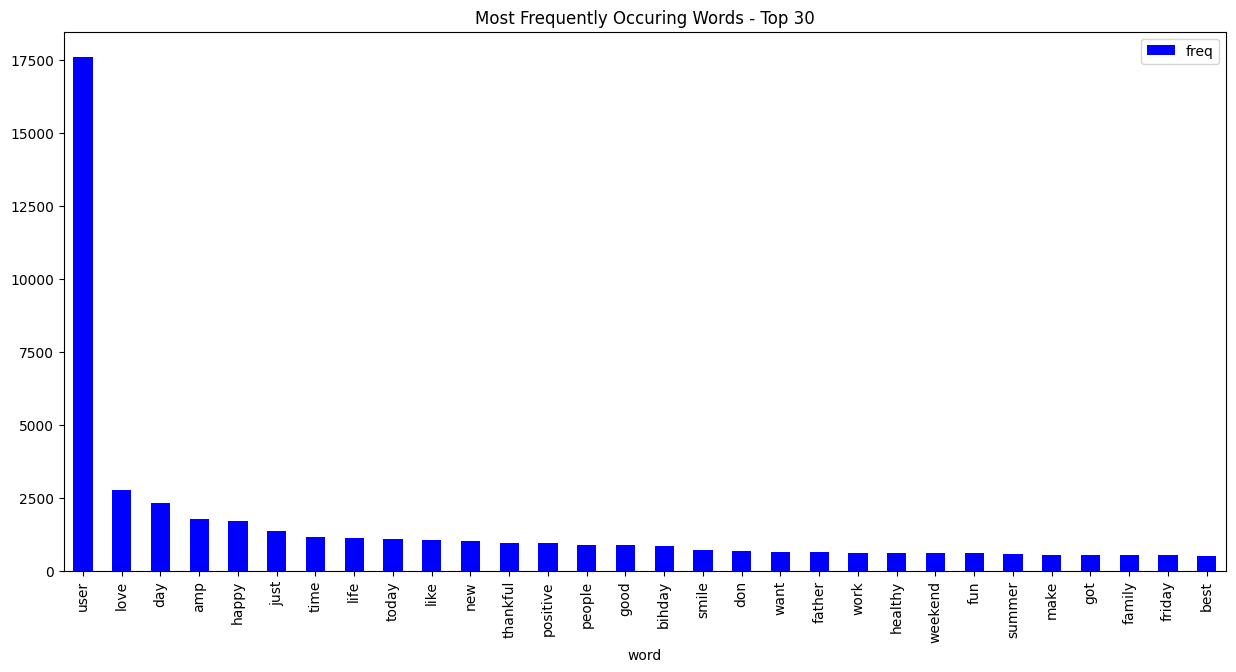

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

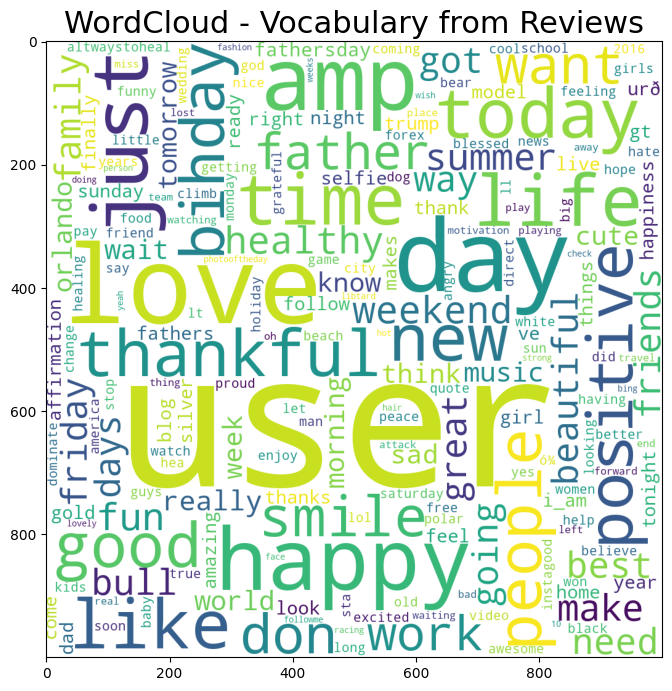

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

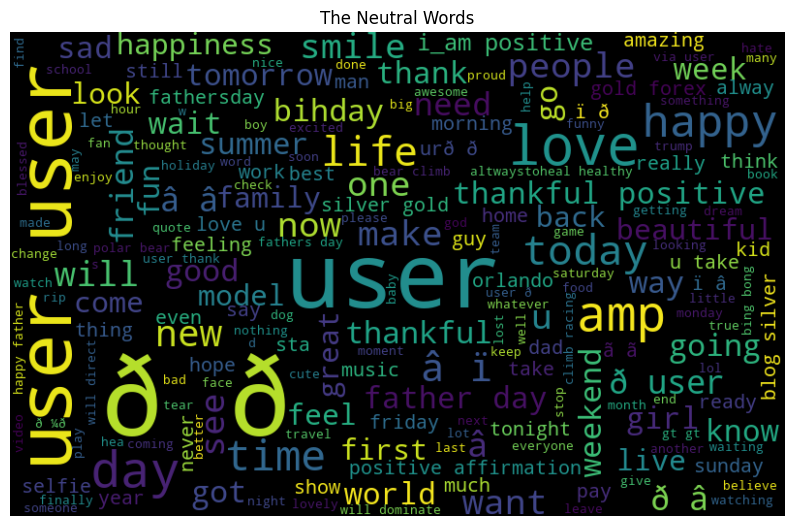

In [18]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


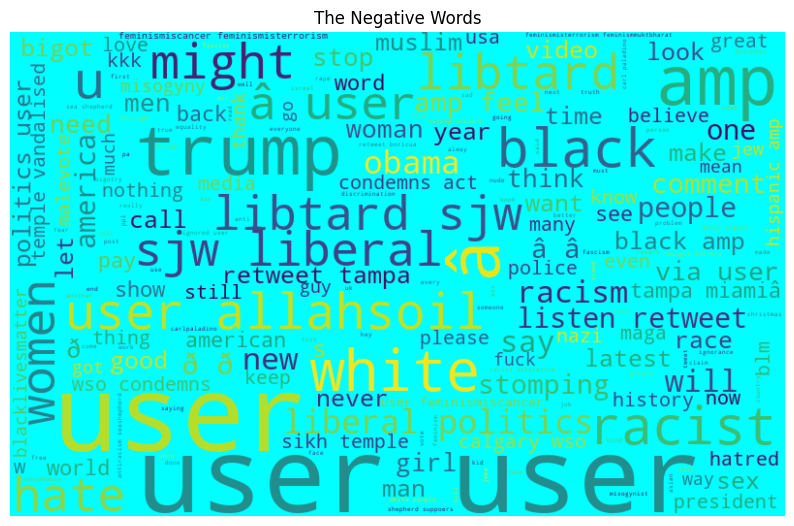

In [19]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [20]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


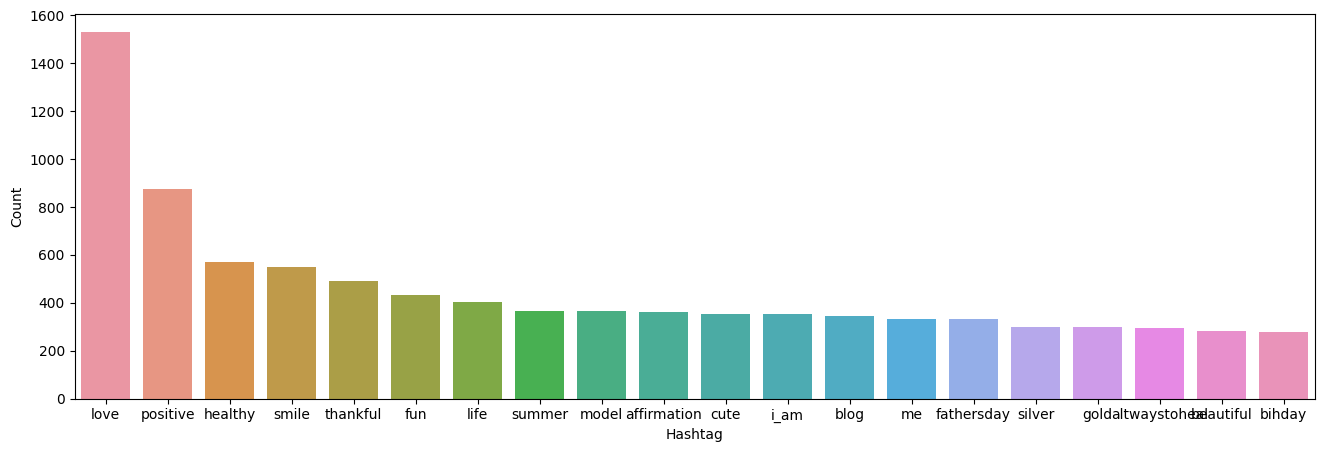

In [22]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


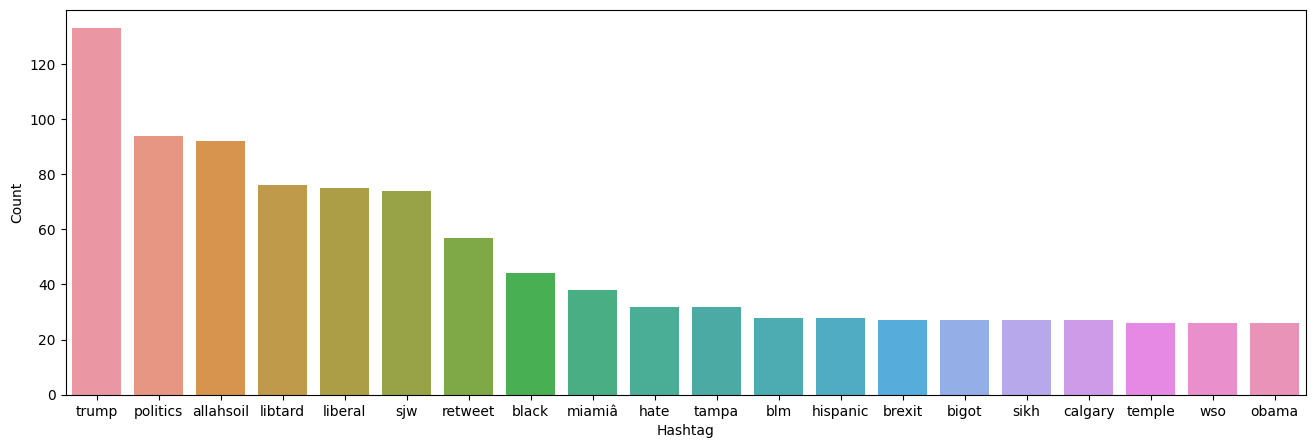

In [23]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [24]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg=1, # 1 for skip-gram model
            hs=0,
            negative=10, # for negative sampling
            workers=2, # no.of cores
            seed=34)

model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)


(6109793, 8411580)

In [25]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6733161211013794),
 ('#prosecco', 0.6259965300559998),
 ('#wanderlust', 0.6050372123718262),
 ('fluffy', 0.599360466003418),
 ('#deutschland', 0.5903863906860352),
 ('#restaurant', 0.5860042572021484),
 ('7!', 0.5858893990516663),
 ('coaching', 0.5804443359375),
 ('#demoday', 0.5802992582321167),
 ('#boardgames', 0.5799059867858887)]

In [26]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7035205960273743),
 ('level.', 0.694292426109314),
 ('ways.', 0.690571665763855),
 ('ownership', 0.6853132247924805),
 ('aol', 0.6851457357406616),
 ('#merica', 0.6846150755882263),
 ('tolerance', 0.6832631230354309),
 ('intelligent', 0.6821982264518738),
 ('law.', 0.6807126998901367),
 ('ruled', 0.678151547908783)]

In [27]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7090520262718201),
 ('"mytraining"', 0.7069714665412903),
 ('training"', 0.6868423223495483),
 ('app,', 0.6458339691162109),
 ('"my', 0.6071628928184509),
 ('app', 0.5956118702888489),
 ('heroku', 0.5801262855529785),
 ('bees', 0.5797905325889587),
 ('#expressjs', 0.566962718963623),
 ("domino's", 0.5643435120582581)]

In [28]:
model_w2v.wv.most_similar(negative = "hate")

[('#staup', 0.025024225935339928),
 ('â\x9c\x88ï¸\x8f', 0.016039300709962845),
 ('#css', 0.002424913225695491),
 ('#ireland', 0.0015629889676347375),
 ('street,', -0.0016988319111987948),
 ('#foodie', -0.0056580970995128155),
 ('#euro2016', -0.0074186744168400764),
 ('lion', -0.00807461328804493),
 ('#bus', -0.009916270151734352),
 ('ð\x9f\x92\x8b', -0.010294021107256413)]

In [29]:
print(gensim.__version__)

4.3.2


In [30]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [31]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

NameError: name 'LabeledSentence' is not defined

In [31]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [32]:
# removing unwanted patterns from the data

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\instr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\instr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [34]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [35]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [36]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [37]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


# Training and Validation of Different Models

In [74]:
# standardization

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import utils
import csv

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [81]:
def file_to_wordset(filename):
    ''' Converts a file with a word per line to a Python set '''
    words = []
    with open(filename, 'r') as f:
        for line in f:
            words.append(line.strip())
    return set(words)

processed_csv = 'train_tweet.csv'
positive_words = file_to_wordset('data/positive-words.txt')
negative_words = file_to_wordset('data/negative-words.txt')
predictions = []

with open(processed_csv, 'r', encoding='utf-8') as f:
    c = True;
    csvFile = csv.reader(f)
    for line in csvFile:
        if c:
            c = False
        else:
            tweet_id, label, tweet = line
            pos_count, neg_count = 0, 0
            for word in tweet.split():
                if word in positive_words:
                    pos_count += 1
                elif word in negative_words:
                    neg_count += 1
            # print pos_count, neg_count
            prediction = 1 if pos_count > neg_count else 0
            predictions.append((tweet_id, int(label), prediction))

correct = sum([1 for p in predictions if p[1] == p[2]])/ len(predictions)
print("Accuracy :", correct)

Accuracy : 0.6398535761216445


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9525716430984857
F1 score : 0.6120777891504606
[[7313  119]
 [ 260  299]]


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9848984189228651
Validation Accuracy : 0.943186084344888
f1 score : 0.598939929328622
[[7198  234]
 [ 220  339]]


In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9321736954073333
f1 score : 0.5445378151260504
[[7125  307]
 [ 235  324]]


In [43]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.49868766404199477
[[7419   13]
 [ 369  190]]


In [45]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608693838388053
Validation Accuracy : 0.9550744587661119
f1 score : 0.5751479289940828
[[7389   43]
 [ 316  243]]


In [42]:
from sklearn import svm

model = svm.LinearSVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating tge f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy : 0.9758875307663427
Validation Accuracy : 0.9300463020898511
f1 score : 0.5495568090249798
[[7091  341]
 [ 218  341]]


C:\Users\instr\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [110]:
from nltk.classify import MaxentClassifier
from nltk.tokenize import word_tokenize
from nltk.classify.util import apply_features
from nltk.classify import accuracy as nltk_accuracy

tweets = []

# Load data from train_tweets.csv
with open('train_tweet.csv', 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip header row if present
    for row in csv_reader:
        tweet_id, label, tweet_text = row  # Assuming id is in the first column, label in the second, and tweet text in the third
        tweets.append((tweet_text, label))

# Define a function to extract features from tweets
def tweet_features(tweet):
    features = {}
    for word in word_tokenize(tweet):
        features[word] = True
    return features

# Extract features from labeled tweets
labeled_featuresets = [(tweet_features(tweet), label) for (tweet, label) in tweets]

# Split data into training and testing sets
train_set, test_set = labeled_featuresets[:500], labeled_featuresets[500:]

# Train the MaxentClassifier
classifier = MaxentClassifier.train(train_set)

# Evaluate the classifier on training set
train_predictions = [(tweet_text, classifier.classify(features)) for (features, label) in train_set]
train_accuracy = nltk_accuracy(classifier, train_set)
print("Training Accuracy:", train_accuracy)

# Evaluate the classifier on validation set
val_predictions = [(features, classifier.classify(features)) for (features, label) in test_set]
val_accuracy = nltk_accuracy(classifier, test_set)
print("Validation Accuracy:", val_accuracy)

# Calculate F1 score for validation set
true_labels = [label for (_, label) in test_set]
predicted_labels = [label for (_, label) in val_predictions]
f1 = f1_score(true_labels, predicted_labels, pos_label='1', average='binary')
print("F1 Score:", f1)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.066
             2          -0.16517        0.934
             3          -0.13712        0.944
             4          -0.11559        0.960
             5          -0.09989        0.978
             6          -0.08807        0.986
             7          -0.07885        0.996
             8          -0.07145        0.998
             9          -0.06537        0.998
            10          -0.06026        0.998
            11          -0.05592        0.998
            12          -0.05218        1.000
            13          -0.04892        1.000
            14          -0.04605        1.000
            15          -0.04351        1.000
            16          -0.04124        1.000
            17          -0.03920        1.000
            18          -0.03735        1.000
            19          -0.03567        1.000
 

In [96]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix

# Assuming x_train, y_train, x_valid, and y_valid are your training and validation data

# Initializing the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
model = GaussianNB()

# Training the model on the training data
model.fit(x_train, y_train)

# Predicting labels for the validation set
y_pred = model.predict(x_valid)

# Printing the training and validation accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
print("F1 Score:", f1_score(y_valid, y_pred))

# Computing the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

Training Accuracy: 0.6625088648783948
Validation Accuracy: 0.6632461519209111
F1 Score: 0.252292303417616
Confusion Matrix:
[[4846 2586]
 [ 105  454]]


In [114]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming x_train, y_train, x_valid, and y_valid are your training and validation data

# Define individual base classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = LogisticRegression()
# Add more classifiers as needed

# Initialize the ensemble classifier with the individual classifiers
model = VotingClassifier(estimators=[('clf1', classifier1), ('clf2', classifier2)], voting='hard')

# Training the ensemble model on the training data
model.fit(x_train, y_train)

# Predicting labels for the validation set
y_pred = model.predict(x_valid)

# Printing the training and validation accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
print("F1 Score:", f1_score(y_valid, y_pred))

# Computing the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9893621459263277
Validation Accuracy: 0.954323614065824
F1 Score: 0.5809414466130884
Confusion Matrix:
[[7373   59]
 [ 306  253]]


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming x_train, y_train, x_valid, and y_valid are your training and validation data

# Initializing the Gradient Boosting classifier
model = GradientBoostingClassifier()

# Training the model on the training data
model.fit(x_train, y_train)

# Predicting labels for the validation set
y_pred = model.predict(x_valid)

# Printing the training and validation accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculating the F1 score for the validation set
print("F1 Score:", f1_score(y_valid, y_pred))

# Computing the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

Training Accuracy: 0.951816778607484
Validation Accuracy: 0.947691152546615
F1 Score: 0.4381720430107527
Confusion Matrix:
[[7410   22]
 [ 396  163]]


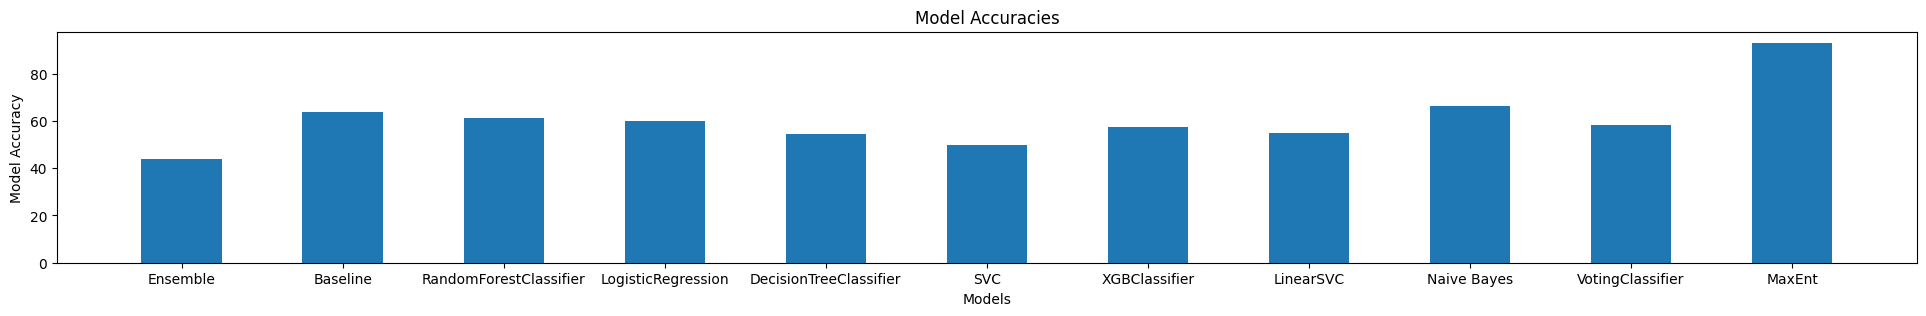

In [11]:
# Sample data
categories = ['Ensemble', 'Baseline', 'RandomForestClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'SVC', 'XGBClassifier', 'LinearSVC', 'Naive Bayes', 'VotingClassifier', 'MaxEnt']
values = [43.81720430107527, 63.98535761216445, 61.20777891504606, 59.8939929328622, 54.45378151260504, 49.868766404199477, 57.51479289940828, 54.95568090249798, 66.32461519209111, 58.09414466130884, 93.11868285550823]

plt.figure(figsize=(24, 3))
# Create bar graph
plt.bar(categories, values, width=0.5)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

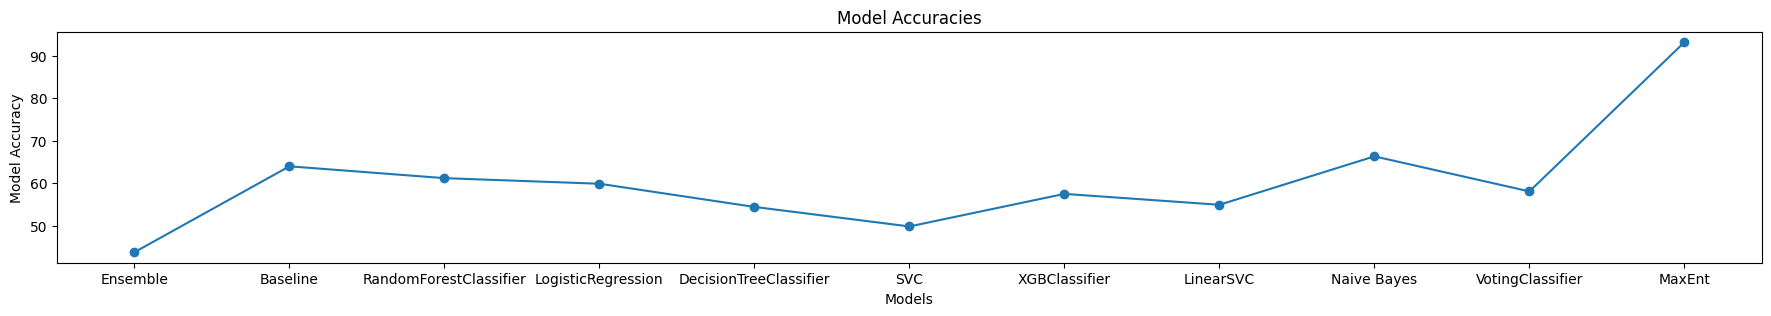

In [12]:
plt.figure(figsize=(22, 3))
# Create bar graph
plt.plot(categories, values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()